<a id='top'></a>

# Homework 2: CSCI 4022 F19
***

**Name**: Adam Ten Hoeve

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.
**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Problem 6](#p6) 

---

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)
# HW2 Part 1
# Problem 1 (Theory: minhashing; 10 pts)

Consider minhash values for a single column vector that contains seven components/rows. Five rows hold 0 and two hold 1. Consider taking all 7! = 5040 possible distinct permutations of seven rows. When we choose a permutation of the rows and produce a minhash value for the column, we will use the number of the row, in the permuted order, that is the first with a 1.  Use Markdown cells to demonstrate answers to the following.

#### a) For exactly how many of the 5040 permutations is the minhash value for the column a 7?  What proportion is this?

There are 7 total rows. In order for the minhash value to be 7, then there must be a 1 in the $7^{th}$ row. This leaves 5 rows with 0 and 1 row with 1. However, the other 1 must be located in a row between 1-6, as the seventh row is taken. Because the minhash value is taken from the first row that contains a 1, it would always have to take the value the other row that contains a 1. This means that it is not possible for the minhash value to be 7. Therefor, there are $0$ permutations where the minhash value is 7, with a proportion of $\frac{0}{5040} = 0.00$.

#### b) For exactly how many of the 5040 permutations is the minhash value for the column a 6?

For the minhash value to be 6, then the two $1$ values would have to be in the $6^{th}$ and $7^{th}$ rows. Therefor our permutation can be reduced to the perumuation of the five $0$ values in the first five rows and the permuation of the $1$ values in the last two rows. There are $5!$ ways to order the five $0$ values. There is $2!$ ways to order the two $1$ values for each of the permuations of the $0$ values. This leads to a total number of permutations of:

$$ 5! * 2! = 240$$

This is $\frac{240}{5040} \approx 0.048$ of the total number of permutations.

#### c) For exactly how many of the 5040 permutations is the minhash value for the column a 3?

For the minhash value to be 3, the following must be true:
- There is a $1$ value located in the $3^{rd}$ row.
- There is not a $1$ located in the first two rows. 

These two conditions lead to the fact that the remaining 1 can be located anywhere in the $4^{th}$ - $7^{th}$ rows. From here, we can break down the permutations into sections:
- We can think of the five 0 values as being permuted before we "insert" the two 1 values into the string. This way, there are $5! = 120$ possible permutations of 0 values.
- Now we "insert" the 1 values into the string. The first 1 is located in the $3^{rd}$ row and can be either of the two 1 values, so there are $2! = 2$ possible combinations.
- The remaining 1 value can be in any location directly before, inbetween or after the last three 0 values. This leads to 4 possible "locations" it can be inserted into.  

Because each of these rules happens independently, we get $120 * 2 * 4 = 960$ permutations, which is $\frac{960}{5040} \approx 0.190$ of all the possible permutations.

***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (Edit Distance; 20 pts)

The following code is a recursive implementation of edit distance.

In [2]:
#see https://www.python-course.eu/levenshtein_distance.php for this and other, more computationally efficient implementations

def LD(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    res = min([LD(s[:-1], t)+1,
               LD(s, t[:-1])+1, 
               LD(s[:-1], t[:-1]) + cost])
    return res


In [3]:
# This is another function from https://www.python-course.eu/levenshtein_distance.php which is much faster
def LD(s, t, costs=(1, 1, 1)):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        costs: a tuple or a list with three integers (d, i, s)
               where d defines the costs for a deletion
                     i defines the costs for an insertion and
                     s defines the costs for a substitution
    """
    rows = len(s)+1
    cols = len(t)+1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]
    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes
    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost) # substitution
#     for r in range(rows):
#         print(dist[r])
    
 
    return dist[row][col]
# default:
print(LD("abc", "xyz"))
# the costs for substitions are twice as high as inserts and delets:
print(LD("abc", "xyz", costs=(1, 1, 2)))
# inserts and deletes are twice as high as substitutes
print(LD("abc", "xyz", costs=(2, 2, 1)))

3
6
3


#### 2a) Determine whether the above implementation only allows insertions and deletions or also also substitutions as single operation by calculating the pairwise edit distances by hand between "house," "whose," and "louse" and comparing to the output from the `LD` function.

**Comparison 1**  
Word1 = "house"     Word2 = "whose"  
To turn word1 into word2 without substitutions:  
- Add a 'w' before 'h'
- Remove the 'u'  

Total operation count: 2  
&nbsp;

**Comparision 2**  
Word1 = "house"     Word2 = "louse"  
To turn word1 into word2 without substitutions:
- Remove 'h'
- Add 'l' before the 'o'

Total operation count: 2  
&nbsp;

**Comparison 3**  
Word1 = "whose"     Word2 = "louse"  
To turn word1 into word2 without substitutions:
- Remove 'w'
- Remove 'h'
- Add 'l' before 'o'
- Add 'u' between 'o' and 's'  

Total operation count: 4

In [4]:
#using LD function
print("The LD edit distance between 'house' and 'whose' is {}".format(LD('house','whose')))

The LD edit distance between 'house' and 'whose' is 2


In [5]:
print("The LD edit distance between 'house' and 'louse' is {}".format(LD('house','louse')))

The LD edit distance between 'house' and 'louse' is 1


In [6]:
print("The LD edit distance between 'louse' and 'whose' is {}".format(LD('louse','whose')))

The LD edit distance between 'louse' and 'whose' is 3


Because the edit distance of the LD function is less than or equal to those computed by hand without using substitutions, we can conclude that the implementation does allow substitution operations.

***

This quesion makes use of two files called: `Actual words.txt` and `pred_words.txt`.

Tom is developing a speech recognition system, but found that the system is misspelling a few words,  He wants to check if the computer is having difficulty in indentifying long words.  Help him out by plotting a graph with the length of the word in the x-axis and the `LD` function distance necessary to convert the system identified string to the original string on the y-axis.

#### 2b)  Compare edit distances and plot distances versus word length in a plot:

In [11]:
with open("actual_words.txt", "r") as act_file:
    with open("pred_words.txt", "r") as pred_file:
        actual_words = act_file.read().split()
        pred_words = pred_file.read().split()
        # Get the length of each word
        x = [len(word) for word in actual_words]
        # Get the Edit Distance between each word and the predicted words
        y = [0] * len(actual_words)
        for index, act_word in enumerate(actual_words):
            y[index] = LD(pred_words[index], act_word)

In [12]:
# Determine the counts of each (length, misspelling) pair
misspell_dict = {}

for i in range(len(x)):
    if (x[i], y[i]) not in misspell_dict.keys():
        misspell_dict[(x[i], y[i])] = 1
    else:
        misspell_dict[(x[i], y[i])] += 1

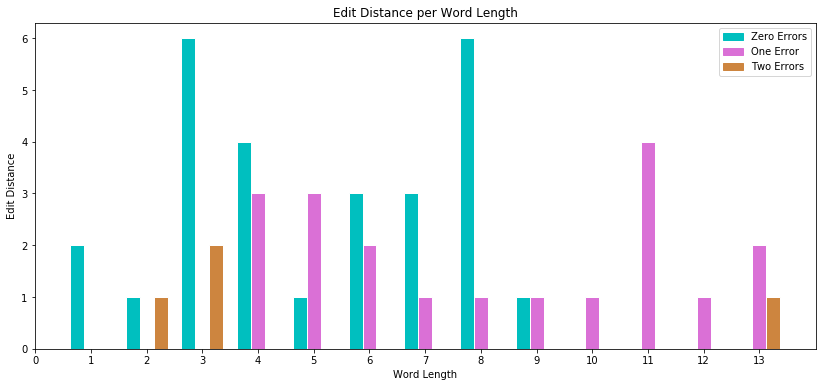

In [13]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

for word_len in np.unique(x):
    for num_misspelled in np.unique(y):
        dict_key = (word_len, num_misspelled)
        if dict_key in misspell_dict.keys():
            bar_width = 1.0 / 4.0
            if num_misspelled == 0:
                ax.bar(word_len-bar_width, misspell_dict[dict_key], width=bar_width, 
                       color='c', edgecolor="white")
            elif num_misspelled == 1:
                ax.bar(word_len, misspell_dict[dict_key], width=bar_width, 
                       color='orchid', edgecolor="white")
            elif num_misspelled == 2:
                ax.bar(word_len+bar_width, misspell_dict[dict_key], width=bar_width, 
                       color='peru', edgecolor="white")
                
z_patch = mpatches.Patch(color='c', label="Zero Errors")
o_patch = mpatches.Patch(color='orchid', label="One Error")
t_patch = mpatches.Patch(color='peru', label="Two Errors")
ax.legend(handles=[z_patch, o_patch, t_patch])
                
ax.set_title("Edit Distance per Word Length")
ax.set_ylabel("Edit Distance")
ax.set_xlabel("Word Length")

ax.set_xticks(np.arange(14));

There does appear to be a positive correlation between the word length and the number of mistakes. The shorter mostly have zero or one errors, while all words longer than 9 characters all had at least one error.

#### 2c)  Compare whether or not there is a misspelling versus word length in a plot:

In [72]:
num_msp = np.array([0] * len(np.unique(x)))
for index, word in enumerate(actual_words):
    # If they are not the same, meaning there is a misspelling
    if word != pred_words[index]:
        num_msp[len(word)-1] += 1

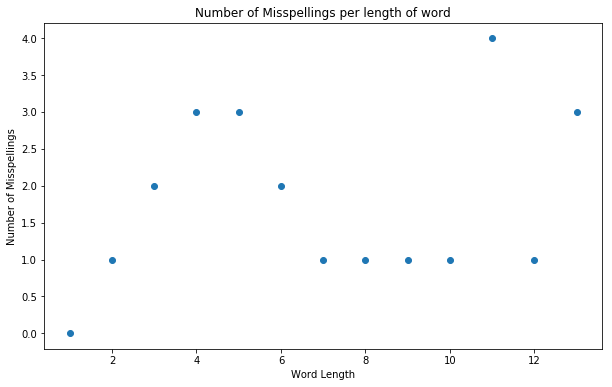

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(np.unique(x), num_msp)
ax.set_title("Number of Misspellings per length of word")
ax.set_xlabel("Word Length")
ax.set_ylabel("Number of Misspellings");

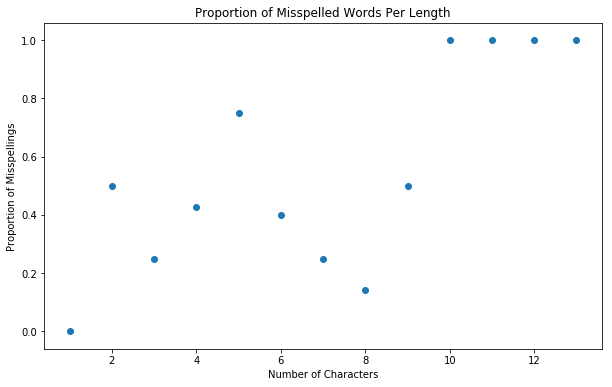

In [74]:
word_length_counts = np.array([0] * len(np.unique(x)))
for index, value in enumerate(np.unique(x)):
    word_length_counts[index] = x.count(value)
word_msp_proportions = num_msp / word_length_counts

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(np.unique(x), word_msp_proportions)
ax.set_title("Proportion of Misspelled Words Per Length")
ax.set_xlabel("Number of Characters")
ax.set_ylabel("Proportion of Misspellings");

From the graph of misspelling counts alone, it does not appear like there is an obvious correlation between word length and misspellings. However, the proportion graph does provide more evidence that there is some correlation. All the words that were 10 characters or longer were misspelled. The words with less than 10 characters are more varied in the proportion that are misspelled, so it is difficult to make a direct claim about the correlation of the data.

#### 2d)  Can you infer from the graph if there is a linear relationship between the number of operations and the length of words?  What about a logistic-linear relationship between whether there is a misspelling or not and the length of words?  Report the confidence intervals of appropriate regression coefficients to support your conclusion.


In [78]:
import statsmodels.api as sm
# For finding the relation of length of word to number of operations (edit distance)
X = x
X = sm.add_constant(X)
Y = y

model = sm.OLS(Y, X)
results = model.fit()

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     3.436
Date:                Thu, 26 Sep 2019   Prob (F-statistic):             0.0699
Time:                        22:10:22   Log-Likelihood:                -46.831
No. Observations:                  50   AIC:                             97.66
Df Residuals:                      48   BIC:                             101.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2205      0.194      1.137      0.261      -0.170       0.611
x1             0.0507      0.027      1.854      0.070      -0.004       0.106
==============================================================================
Omnibus:                       10.578   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.399
Skew:                           1.073   Prob(JB):                      0.00552
Kurtosis:                       3.618   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above table is about the relationship between the length of the words and the number of operations to fix the mmistakes. From the table we can see that there is a positive correlation of $\approx 0.051$ with a p-value of $0.070$ and Confidence Interval of $[-0.004, 0.106]$. This is very close to, but just shy of being statistically significant at the level of 95% confidence, but is statistically significant at the 90% confidence level.

In [107]:
# Calculate a boolean condition for if the word was misspelled or not
was_misspelled = np.array([np.array(actual_words) == np.array(pred_words)])
was_misspelled = was_misspelled.astype(int)
was_misspelled

# Logistic regression for number of misspellings vs. length of words
X = x
X = sm.add_constant(X)
Y = was_misspelled[0]

model = sm.Logit(Y, X)
results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.612733
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.1119
Time:                        22:35:04   Log-Likelihood:                -30.637
converged:                       True   LL-Null:                       -34.497
                                        LLR p-value:                  0.005458
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8261      0.719      2.541      0.011       0.417       3.235
x1            -0.2633      0.103     -2.547      0.011      -0.466      -0.061
==============================================================================
"""

The table above is the results of a logistic regression between the lengths of the words and whether the word was misspelled. From the table, we get a relationship with pvalue of $0.011$ and confidence interval of $[-0.466, -0.061]$. Similar to the other regression, the coefficient is not statistically significant at the 95% confidence level.

From these two regressions, we can make the educated decision that the number of misspellings and number of edits to fix the misspellings does not depend on the length of the words.

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (Applied Minhashing; 20 pts)

In this problem we compare similarities of 5 documents available on http://www.gutenberg.org

 1) The first approximately 10000 characters of Miguel de Unamuno's *Niebla*, written in Spanish, in the file `Niebla.txt`
 
 2) The first approximately 10000 characters of Miguel de Cervantes *The Ingenious Gentleman Don Quixote of La Mancha*, written in Spanish, in the file `DQ.txt`
 
 3) The first approximately 10000 characters of Homer's *The Iliad*, translated into English by Alexander Pope, in the file `Iliad.txt`
 
 4) The first approximately 10000 characters of Mark Twain's *The Adventures of Tom Sawyer*, in the file `TS.txt` 
 
 5) A selected approximately 10000 characters of Mark Twain's *Adventures of Huckleberry Finn*, in the file `MT.txt`

### a) Clean the 4 documents, scrubbing all punctuation, changes cases to lower case, and removing accent marks as appropriate.  

You should have only 27 unique characters in each book/section after cleaning, corresponding to white spaces and the 26 letters.  

(You can and probably should use functions in the string package such as `string.lower`, `string.replace`, etc.)




In [41]:
import re
import io

In [104]:
def clean_doc(filename):
    # Takes a filename, opens it, cleans it, and returns an array of the words in the file.
    with open(filename, "r", encoding="utf-8") as file:
        file_text = file.read()
        # Remove all punctuation and numbers
        file_text = re.sub(r"[\,\.\!\-\?\'\—\_\(\)\¡\:\;\«\»\’\¿“”*\[\]\"0-9]", "", file_text)
        # Remove new line characteres
        file_text = re.sub(r"\n", " ", file_text)
        # Convert everything to lower case
        file_text = file_text.lower()
        # Start scrubbing specific characters
        file_text = re.sub(r"ñ", "n", file_text)
        file_text = re.sub(r"ó", "o", file_text)
        file_text = re.sub(r"í", "i", file_text)
        file_text = re.sub(r"é", "e", file_text)
        file_text = re.sub(r"á", "a", file_text)
        file_text = re.sub(r"ú", "u", file_text)
        file_text = re.sub(r"ć", "c", file_text)
        # Remove extra whitespace
        file_text = ' '.join(file_text.split())
        # Return the scrubbed text
        return file_text
    
Niebla_text = clean_doc("Niebla.txt")
TS_text = clean_doc("TS.txt")
HF_text = clean_doc("HF.txt")
Iliad_text = clean_doc("Iliad.txt")
DQ_text = clean_doc("DQ.txt")

# Niebla_set = set(Niebla_text.split())
# TS_set = set(TS_text.split())
# HF_set = set(HF_text.split())
# Iliad_text = set(Iliad_text.split())
# DQ_text = clean_doc("DQ.txt")


### b) Compute exact similarity scores between the documents.  Are these the expected results?



In [131]:
def calc_similarity(k, doc1, doc2):
    # Split each document into shingles of size k
    doc1_shingles = set([doc1[0+i:k+i] for i in range(0, len(doc1))])
    doc2_shingles = set([doc2[0+i:k+i] for i in range(0, len(doc2))])
                
    # Get the number of shingles that are in both
    num_in_both = np.sum([1 if shingle in doc2_shingles else 0 for shingle in doc1_shingles])
    # Get the number of shingles that are in either
    num_in_either = len(doc1_shingles) + len(doc2_shingles) - num_in_both
    # Calculate the similarity
    return num_in_both / num_in_either

In [134]:
print("When k = {}, the similarity between TS and HF is {:0.4f}".format(7, calc_similarity(7, TS_text, HF_text)))
print("When k = {}, the similarity between TS and Niebla is {:0.4f}".format(7, calc_similarity(7, TS_text, Niebla_text)))
print("When k = {}, the similarity between TS and The Iliad is {:0.4f}".format(7, calc_similarity(7, TS_text, Iliad_text)))
print("When k = {}, the similarity between TS and DQ is {:0.4f}".format(7, calc_similarity(7, TS_text, DQ_text)))
print()
print("When k = {}, the similarity between Niebla and DQ is {:0.4f}".format(7, calc_similarity(7, Niebla_text, DQ_text)))
print("When k = {}, the similarity between Niebla and HF is {:0.4f}".format(7, calc_similarity(7, Niebla_text, HF_text)))
print("When k = {}, the similarity between Niebla and the Iliad is {:0.4f}".format(7, calc_similarity(7, Niebla_text, Iliad_text)))
print()
print("When k = {}, the similarity between Iliad and DQ is {:0.4f}".format(7, calc_similarity(7, Iliad_text, DQ_text)))
print("When k = {}, the similarity between Iliad and HF is {:0.4f}".format(7, calc_similarity(7, Iliad_text, HF_text)))

When k = 7, the similarity between TS and HF is 0.0660
When k = 7, the similarity between TS and Niebla is 0.0012
When k = 7, the similarity between TS and The Iliad is 0.0357
When k = 7, the similarity between TS and DQ is 0.0011

When k = 7, the similarity between Niebla and DQ is 0.0671
When k = 7, the similarity between Niebla and HF is 0.0001
When k = 7, the similarity between Niebla and the Iliad is 0.0013

When k = 7, the similarity between Iliad and DQ is 0.0009
When k = 7, the similarity between Iliad and HF is 0.0334


In [227]:
k = np.arange(0, 16)
TS_HF_sim = [calc_similarity(k_i, TS_text, HF_text) for k_i in k]
TS_Niebla_sim = [calc_similarity(k_i, TS_text, Niebla_text) for k_i in k]
TS_Iliad_sim = [calc_similarity(k_i, TS_text, Iliad_text) for k_i in k]
TS_DQ_sim = [calc_similarity(k_i, TS_text, DQ_text) for k_i in k]
Niebla_DQ_sim = [calc_similarity(k_i, Niebla_text, DQ_text) for k_i in k]
Niebla_HF_sim = [calc_similarity(k_i, Niebla_text, DQ_text) for k_i in k]
Niebla_Iliad_sim = [calc_similarity(k_i, Niebla_text, DQ_text) for k_i in k]
Iliad_HF_sim = [calc_similarity(k_i, Iliad_text, HF_text) for k_i in k]
Iliad_DQ_sim = [calc_similarity(k_i, Iliad_text, DQ_text) for k_i in k]

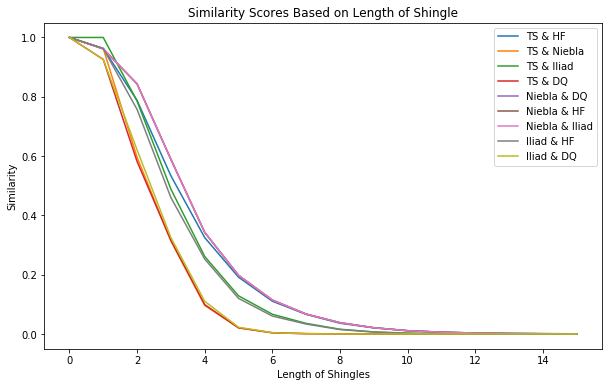

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(k, TS_HF_sim, label="TS & HF")
ax.plot(k, TS_Niebla_sim, label="TS & Niebla")
ax.plot(k, TS_Iliad_sim, label="TS & Iliad")
ax.plot(k, TS_DQ_sim, label="TS & DQ")
ax.plot(k, Niebla_DQ_sim, label="Niebla & DQ")
ax.plot(k, Niebla_HF_sim, label="Niebla & HF")
ax.plot(k, Niebla_Iliad_sim, label="Niebla & Iliad")
ax.plot(k, Iliad_HF_sim, label="Iliad & HF")
ax.plot(k, Iliad_DQ_sim, label="Iliad & DQ")
ax.legend()
ax.set_title("Similarity Scores Based on Length of Shingle")
ax.set_ylabel("Similarity")
ax.set_xlabel("Length of Shingles");

We can see that our similarity scores are what we expected them to be. The two Mark Twain passages are the most similar to each other, and also the least similar from the two spanish passages. The Iliad has a simiarlity score in between the two Mark Twain and Spanish passages, which makes sense because its a translation from greek, but still written in English.  

From the graph we can see that when $k$ is very small (k < 3), the similarities between all the documents is very high. This is because it is comparing single or pairs of letters, which are likely to appear even if the content of the two documents is very different. If $k > 7$, then the similarities are very small because it would be comparing multiple words to each other, which is unlikely with the overall small length of the documents. When $3 \le k \le 7$ is where we can see the clearest difference in similarity between documents, such as TS and HF being similar to each other whereas TS and DQ are very different.

### c) Implement minhashing with 1000 hash functions on the 4 documents, checking your results against those in part b).



In [203]:
def hash_1000(row_num):
    p = 599779
    hashes = [(i*row_num + 7) % p for i in range(1000)]
    return hashes

In [206]:
def calc_minhash_signature_matrix(k, docs):
    # Get the shingles of each document
    doc_shingles = [set([doc[0+i:k+i] for i in range(0, len(doc))]) for doc in docs]
    # Create a set of all the shingles of all documents
    all_shingles = set([])
    for shingles_set in doc_shingles:
        all_shingles = all_shingles.union(shingles_set)

    # Create characteristic matrix
    char_matrix = np.array([[0] * len(docs)] * len(all_shingles))
    # Populate cell (i, j) in char matrix with 1 if shingle_num i exists in document_num j.
    for shingle_index, shingle in enumerate(all_shingles):
        # If shingle is in document, set the index value to 1
        for doc_index, shingle_set in enumerate(doc_shingles):
            if shingle in shingle_set:
                char_matrix[shingle_index][doc_index] = 1
    
    # Initialize signature matrix
    signature_matrix = np.array([[np.inf] * len(docs)] * 1000)  # There 1000 hash functions so 1000 rows
    
    # For every row in character matrix
    for row_num, char_row in enumerate(char_matrix):
        # Calculate 1000 hash values
        hashes = hash_1000(row_num)
        # For each document on that row
        for doc_num, has_a_shingle in enumerate(char_row):
            # If that document contains that shingle
            if has_a_shingle:
                # Set the value of that column to the min(sig(i, c), hash(r))
                signature_matrix[:, doc_num] = np.minimum(hashes, signature_matrix[:, doc_num])
    return signature_matrix

sigm = calc_minhash_signature_matrix(7, [TS_text, HF_text, Iliad_text, Niebla_text, DQ_text])

In [208]:
def calc_sim_from_signature_matrix(sigm, doc1, doc2):
    doc_to_index = {"TS": 0, "HF": 1, "Iliad": 2, "Niebla": 3, "DQ": 4}
    index1 = doc_to_index[doc1]
    index2 = doc_to_index[doc2]
    
    sim = np.sum(sigm[:, index1] == sigm[:, index2]) / len(sigm[:, 1])
    print("The MinHash similarity between {} and {} is {:0.4f}".format(doc1, doc2, sim))
    
calc_sim_from_signature_matrix(sigm, "TS", "HF")
calc_sim_from_signature_matrix(sigm, "TS", "Niebla")
calc_sim_from_signature_matrix(sigm, "TS", "Iliad")
calc_sim_from_signature_matrix(sigm, "TS", "DQ")
print()
calc_sim_from_signature_matrix(sigm, "Niebla", "DQ")
calc_sim_from_signature_matrix(sigm, "Niebla", "HF")
calc_sim_from_signature_matrix(sigm, "Niebla", "Iliad")
print()
calc_sim_from_signature_matrix(sigm, "Iliad", "DQ")
calc_sim_from_signature_matrix(sigm, "Iliad", "HF")

The MinHash similarity between TS and HF is 0.0770
The MinHash similarity between TS and Niebla is 0.0010
The MinHash similarity between TS and Iliad is 0.0100
The MinHash similarity between TS and DQ is 0.0030

The MinHash similarity between Niebla and DQ is 0.0850
The MinHash similarity between Niebla and HF is 0.0010
The MinHash similarity between Niebla and Iliad is 0.0010

The MinHash similarity between Iliad and DQ is 0.0010
The MinHash similarity between Iliad and HF is 0.0160


We can see that the trend is the same with the MinHash algorithm as it was with our results from **part b**. The numbers are slightly different but the overall trends are the same.



### d) Discussion:

Can we detect expected differences here?  Are the two Spanish docuemnts most similar to each other?  Are the two documents by the same author, with the same theme, the most similar?  What kind of alternatives 



As seen above, the two spanish documents are most similar to each other and the two Mark Twain novels are also most similar to each other. This makes sense as they will have similar character combinations. This means we are detecting expected differences, based on our previous knowledge of what should be similar and different about the documents.

# HW2 Part 2

***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 4 (Theory: GMM; 10 pts)

In the GMM slides from lecture 5, we stated that the weights $w_m$ of the 1-dimension GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

Because $f(x |\sigma)$ is a PDF, we know that all the area under the curve must sum to 1. Therefor, if we take it's integral over all possible values, then it will be equal to 1.

$$
\begin{align*}
    \int_{-\infty}^{\infty} f(x | \sigma) &= \int_{-\infty}^{\infty} \Big[ w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2) \Big] \\
   1 &= \int_{-\infty}^{\infty} w_1\phi(x|\mu_1, \sigma_1^2) + \int_{-\infty}^{\infty}w_2\phi(x|\mu_2, \sigma_2^2) + \dots + \int_{-\infty}^{\infty}w_m\phi(x|\mu_m, \sigma_m^2) \\
   1 &= w_1 \int_{-\infty}^{\infty} \phi(x|\mu_1, \sigma_1^2) + w_2 \int_{-\infty}^{\infty}\phi(x|\mu_2, \sigma_2^2) + \dots + w_m \int_{-\infty}^{\infty}w_m\phi(x|\mu_m, \sigma_m^2) \\
   1 &= w_1 (1) + w_2 (1) + \dots + w_m (1) \\
   1 &= \sum_{i=1}^m w_i
\end{align*}
$$

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

Intuitively, each weight $w_i$ represents the proportion of the total area of the GMM that lies under component $i$. It can be thought of as $w_i = 1 - \Delta_i$ where $\Delta_i$ is the proportion of the total area **not** under the $i^{th}$ component. In this way, for $w_i$ to be negative, then it would have a negative area (which is not possible) and $\Delta_i > 1$, which would mean that there was more area under all the other components than there was under the total GMM, which is also not possible. Therefor, we can not have a negative weight.

***
<a/ id='p5'></a>
[Back to top](#top)
# Problem 5 (Applied K-Means; 20 pts)

#### Given is the youtube dataset, which has 1000 trending videos of Youtube (2017) with additional information such as views, likes, dislikes, etc about each video

Import youtube dataset as pandas dataframe, see kmeans_youtube_data.csv.

In [109]:
df = pd.read_csv("kmeans_youtube_dataset.csv")
df.head()

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count
0,p9wE8dyzEJE,A Quiet Place (2018) - Official Teaser Trailer...,Paramount Pictures,1,2336528,6729,167,1286
1,rvskMHn0sqQ,A Selfish Argument for Making the World a Bett...,Kurzgesagt – In a Nutshell,27,1865071,137897,3691,15624
2,NaX-oGJEZI8,Aaj Se Teri | Padman | Akshay Kumar & Radhika ...,Zee Music Company,10,4222559,92092,3460,5512
3,dUaCEs3HfdI,Aastha Gill - Buzz feat Badshah | Priyank Shar...,Sony Music India,10,17546748,237743,27279,21034
4,7kLO2AB5SPM,about Logan Paul,CaseyNeistat,22,2768013,165858,9001,14577


#### (a) Perform k-means clustering on this dataset using Euclidean distance as the distance metric. 
- Take 'views' and 'likes' as the features
- initiate the centroids as the extreme points
- choose k as 5

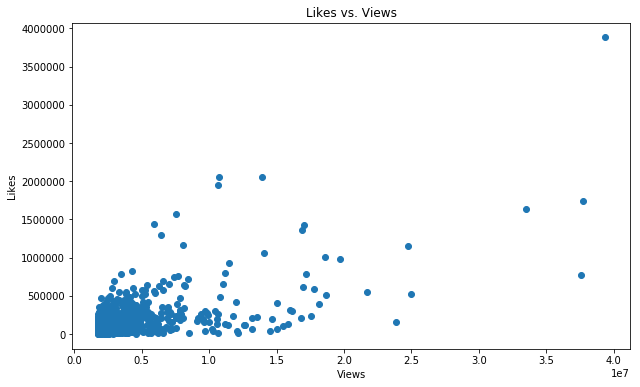

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(df["views"], df["likes"])
ax.set_title("Likes vs. Views")
ax.set_xlabel("Views")
ax.set_ylabel("Likes");

In [80]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [5]:
# We're setting the 5 centroids based on the percentiles of the data. This way we still take into account the 'extreme'
# points without completely skewing the data.
centroids = np.array([[0]*2]*5)
centroids[0] = [np.percentile(df["views"], 0), np.percentile(df["likes"], 0)]
centroids[1] = [np.percentile(df["views"], 25), np.percentile(df["likes"], 25)]
centroids[2] = [np.percentile(df["views"], 50), np.percentile(df["likes"], 50)]
centroids[3] = [np.percentile(df["views"], 75), np.percentile(df["likes"], 75)]
centroids[4] = [np.percentile(df["views"], 100), np.percentile(df["likes"], 100)]

In [6]:
dfData = df[["views", "likes"]].copy()
dfData["cluster"] = np.array([-1] * len(dfData))

k = 5  # Number of means
n = 30  # how many loops
dists = [[-1] * k] * len(dfData)  # Initialize list of distances
cluster_labels = [-1] * len(dfData)
for i in range(n):
    # Label each point based on the nearest centroid
    for j in range(len(dfData)):
        dists[j] = [dist([dfData["views"].iloc[j], dfData["likes"].iloc[j]], centroid) for centroid in centroids]
        cluster_labels[j] = dists[j].index(min(dists[j]))
    dfData["cluster"] = cluster_labels
    # Update the centroids based on the clusters
    for cluster in np.arange(5):
        # Extract the data per cluster of that type
        dfCluster = dfData.loc[dfData["cluster"] == cluster]
        new_x = np.mean(dfCluster["views"])
        new_y = np.mean(dfCluster["likes"])
        centroids[cluster] = [new_x, new_y]

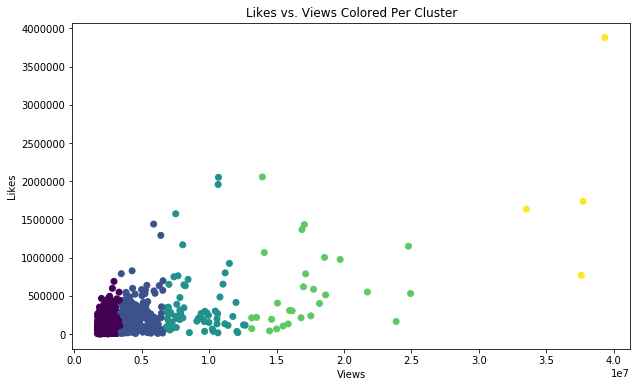

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.scatter(dfData["views"], dfData["likes"], c=dfData["cluster"])
ax.set_title("Likes vs. Views Colored Per Cluster")
ax.set_xlabel("Views")
ax.set_ylabel("Likes");

How will you deal with the outliers in this problem?

Ignoring data is a bad idea, so I think a good approach would be to assign the centroids in percentiles. In this way, the outliers will still be represented by the high percentiles but the majority of the data, and the centroids, will still be together.

#### (b) How does 'category_id' affect the results? Which category gets most views and likes?

In [22]:
categs = {}
labels = []
c = 0
for i in df["category_id"]:
    if i not in categs.keys():
        categs[i] = c
        c += 1
    labels.append(categs[i])

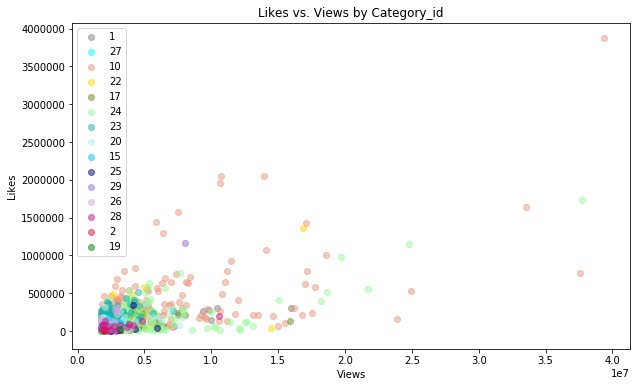

In [36]:
import matplotlib.cm as cm
colors = np.array(["grey", "cyan", "darksalmon", "gold", "olivedrab", "palegreen", \
                   "lightseagreen", "paleturquoise", "deepskyblue", "navy", "mediumpurple", \
                   "plum", "mediumvioletred", "crimson", "green"])
df["category_id"] = df["category_id"].astype("category")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for index, category in enumerate(df["category_id"].unique()):
    dfPlot = df.loc[df["category_id"] == category]
    ax.scatter(dfPlot["views"], dfPlot["likes"], alpha=0.5, c=colors[index], label=category)

ax.set_title("Likes vs. Views by Category_id")
ax.set_xlabel("Views")
ax.set_ylabel("Likes")
ax.legend();

Most of the categories appears to get similar numbers of views and likes. The most obvious outliers are category 24, which gets a lot of views but not a lot of likes and category 10 which gets both a lot of views and a lot of likes.

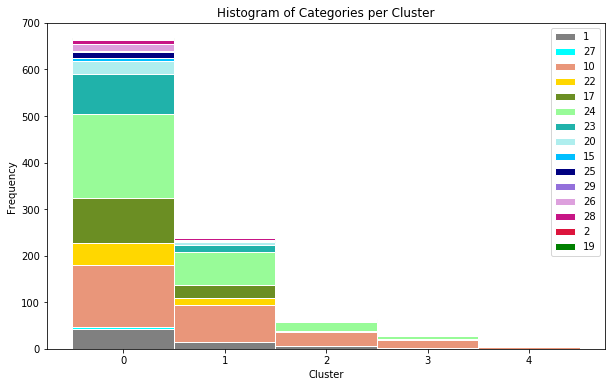

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
dfData["category"] = pd.to_numeric(df["category_id"])
margin_bottom = np.zeros(len(dfData["cluster"].drop_duplicates()))

for index, category in enumerate(dfData["category"].unique()):
    dfCat = dfData.loc[dfData["category"] == category]
    counts, bins, bars = ax.hist(dfCat["cluster"], bins=np.arange(6)-0.5,  bottom=margin_bottom, 
                                 color=colors[index], edgecolor="white", label=str(category))
    margin_bottom += counts

ax.set_title("Histogram of Categories per Cluster")
ax.set_xlabel("Cluster")
ax.set_ylabel("Frequency")
ax.legend();

The histogram also shows us the distribution of the categories per cluster. Similar to above, we can see that categories 10 and 24 are the most likely to be classified into the higher categories (and thus having more views and likes) than the other categories.

#### (c) Find the optimal k for the previous problem (a) using the idea of an "elbow" or bend in the average distance-to-centroid of the data set.

In [101]:
from sklearn.cluster import KMeans
# Need to calculate the standard square error for each point for different values of k
SSE = []
k = np.arange(1, 11)
for k_i in k:
    kmeans = KMeans(n_clusters = k_i).fit(dfData[["views", "likes"]])
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(dfData[["views", "likes"]])
    dist = 0
#     Calculate Euclidean distance between all points and their centroids
    for i in range(len(dfData)):
        cluster_centroid = centroids[pred_clusters[i]]
        dist += ((dfData["views"].iloc[i] - cluster_centroid[0])**2 
                 + (dfData["likes"].iloc[i] - cluster_centroid[1])**2)
    SSE.append(dist)

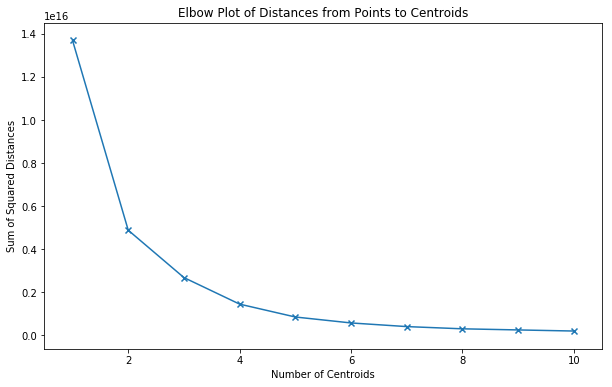

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(k, SSE)
ax.scatter(k, SSE, marker="x")
ax.set_title("Elbow Plot of Distances from Points to Centroids")
ax.set_xlabel("Number of Centroids")
ax.set_ylabel("Sum of Squared Distances");

From the plot above, we can determine the "optimal" value of k based on when the error decreases little beyond that value. For our data set, we can say that the optimal k value is 5.

#### (d) Include 'comments' as a feature and do the clustering again.  Are there certain types of category_ids that seem to lend themselves to more comments?  Explain.

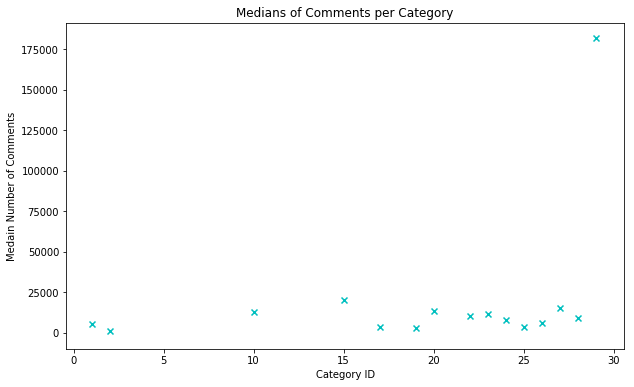

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for index, category in enumerate(dfData["category"].unique()):
    dfCat = dfData.loc[dfData["category"] == category]
    ax.scatter(category, np.median(dfCat["comments"]), marker="x", c="c")
ax.set_title("Medians of Comments per Category")
ax.set_xlabel("Category ID")
ax.set_ylabel("Medain Number of Comments");

From the plot above, we can see that videos from category 29 have far more comments per video ($\sim 175,000$) than the other categories, which all have between $5,000$ and $20,000$.

In [143]:
dfData["comments"] = df["comment_count"]
# Same code as above but with comments as a feature
SSE_with_comments = []
k = np.arange(1, 11)
for k_i in k:
    kmeans = KMeans(n_clusters = k_i).fit(dfData[["views", "likes", "comments"]])
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(dfData[["views", "likes", "comments"]])
    dist = 0
#     Calculate Euclidean distance between all points and their centroids
    for i in range(len(dfData)):
        cluster_centroid = centroids[pred_clusters[i]]
        dist += ((dfData["views"].iloc[i] - cluster_centroid[0])**2 
                 + (dfData["likes"].iloc[i] - cluster_centroid[1])**2
                 + (dfData["comments"].iloc[i] - cluster_centroid[2])**2)
    SSE_with_comments.append(dist)

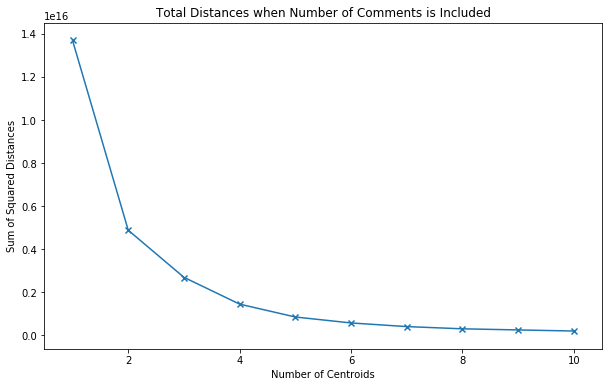

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(k, SSE_with_comments)
ax.scatter(k, SSE, marker="x")
ax.set_title("Total Distances when Number of Comments is Included")
ax.set_xlabel("Number of Centroids")
ax.set_ylabel("Sum of Squared Distances");

After fitting our model with "comment_count" as a feature, we can see that the elbow graph is about the same as the one with only "views" and "likes" as features.

#### (e) What are the shortcomings of using euclidean distance in this case? What other distance metrics can be used apart from euclidean?

In [146]:
df[["views", "likes", "comment_count"]].describe()

,views,likes,comment_count
count,1.000000e+03,1.000000e+03,1000.00000
mean,3.802194e+06,1.660264e+05,19229.45300
std,3.694175e+06,2.486123e+05,42509.86567
min,1.724134e+06,6.700000e+02,24.00000
25%,2.031443e+06,3.421225e+04,3209.50000
50%,2.618269e+06,1.068750e+05,9060.50000
75%,3.930847e+06,2.083985e+05,20622.00000
max,3.934993e+07,3.880074e+06,692311.00000


One shortcoming is that the values are not normalized. We can see in the table above that the values and standard deviations of the "views" and "likes" are far greater than the values of "comment_count." This means that they will have a higher difference in distance, and thus greater influence on the Euclidean distance calculation, than the values of "comment_count" will have.

#### (f) What is the correlation coefficient between 'views' and 'likes'? What do you infer from this?

In [147]:
np.corrcoef(dfData["views"], dfData["likes"])

array([[1.        , 0.60646017],
       [0.60646017, 1.        ]])

The correlation coefficient between "views" and "likes" is $\approx 0.606$, which is a strong correlation. This basically means that for every 10 people that watch a video, 6 of them will like it. This will mean that our data is likely occuring along a roughly linear line between "views" and "likes".

***
<a/ id='p6'></a>
[Back to top](#top)
# Problem 6 (K-means vs. GMM; 20 pts)

In this consider a synthetic data set generated by simulating data coming from 3 components.

In [60]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(4022)

Cluster 1 is coming from a uniform process on $[0,1] \times [0,1]$:

In [61]:
def unifcluster(nsamp):
    d={'x': np.random.random(size=nsamp), 'y': np.random.random(size=nsamp)}
    dftemp= pd.DataFrame(data=d)
    dftemp['True_Cluster']='uniform'
    return dftemp

#Example 70 points
dfunif=unifcluster(70)
# plt.scatter(dfunif['x'],dfunif['y'], color='green')
# plt.ylim(-1, 3);
# plt.xlim(-1, 3);


Cluster 2 is coming from a multivariate normal (a Gaussian!)

In [62]:
def normcluster(nsamp):
    d=np.random.multivariate_normal([1.05,1.3], [[.5,-.1],[-.1,.2]],nsamp)
    dftemp = pd.DataFrame(data=d, columns=['x','y'])
    dftemp['True_Cluster']='normal'
    return dftemp

#Example 50 points
dfnorm=normcluster(50)
# plt.scatter(dfnorm['x'],dfnorm['y'], color='blue')
# plt.ylim(-1, 3);
# plt.xlim(-1, 3);

       
       

Cluster 3 is coming from... something angular?

In [63]:
def polarcluster(nsamp):
    beta=np.random.beta(10,10,nsamp)
    theta=[bi*np.pi-.9 for bi in beta]
    runif=np.random.random(nsamp)
    r=[.3*ri+1.55 for ri in runif]
    x=[0]*nsamp
    y=[0]*nsamp
    for i in range(nsamp):
        x[i]=r[i]*np.cos(theta[i])
        y[i]=r[i]*np.sin(theta[i])
    d={'x': x, 'y': y}
    dftemp= pd.DataFrame(data=d)
    dftemp['True_Cluster']='polar'
    return dftemp

#Example 50 points
dfpolar=polarcluster(50)
# plt.scatter(dfpolar['x'],dfpolar['y'], color='red')
# plt.ylim(-1, 3);
# plt.xlim(-1, 3);    

All together, these give us our data set:

,x,y,True_Cluster
0,0.355593,1.262988,normal
1,0.779189,0.764100,normal
2,0.572387,2.050624,normal
3,-0.524114,1.761501,normal
4,1.353092,1.563850,normal
5,1.249703,0.982300,normal
6,0.706100,0.646253,normal
7,1.307480,2.089174,normal
8,0.444544,1.391092,normal
9,1.106045,0.986996,normal


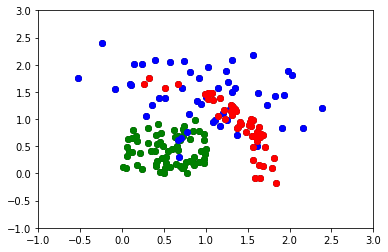

In [64]:
df=dfnorm.append(dfunif.append(dfpolar))
plt.scatter(df['x'],df['y'], color='black')

plt.scatter(dfunif['x'],dfunif['y'], color='green')
plt.scatter(dfnorm['x'],dfnorm['y'], color='blue')
plt.scatter(dfpolar['x'],dfpolar['y'], color='red')
plt.ylim(-1, 3);
plt.xlim(-1, 3);  

df.head(10)


The goal of this problem is to compare k-means and GMMs on this sort of data, and describe strenghts and weaknesses of each model in a way that we could choose between them *a priori* in the future.  The data is in `df`.

### Part 1: K-Means and Sensitivity

For both k=2 and k=3, we are going to run k-means 100 times, each with a different random initialization.

Perform the following operations 100 times:

    1) Initialize k-means by randomly selecting `k' of your data points
    2) Run k-means until convergence
    3) Save the final cluster for each point
    
    
A few rows of your final k=3 output might be:

`dfk3.head(3)'

| Point # | Run1 | Run2 | Run3 | ... | Run 100 |
| --- | --- |
| 1 | 1 | 2 | 1| ... | 1 |
| 2 | 3 | 1 | 3 | ... | 3|
| 3 | 1 | 2 | 1 | ... | 1|

(so in this example, points 1 & 3 were always in the same cluster, but point 2 was elsewhere)

In [6]:
def df_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [12]:
K = [2, 3]
n = 100  # Repeat n times

df_size = len(df)
dfk2 = pd.DataFrame(data=np.zeros([n, df_size]))
dfk3 = pd.DataFrame(data=np.zeros([n, df_size]))
dfTemp = df.copy()

for k in K:
    for run_num in range(n):
        data_indexes = np.random.choice(np.arange(df_size), k, replace=False)
        centroids = df[["x", "y"]].iloc[data_indexes, :]
        dists = [[-1] * k]* df_size
        # Run k means until convergence, which we'll estimate as 10
        for i in range(10):
            cluster_labels = [-1] * df_size
            # Label each point based on the nearest centroid
            for j in range(df_size):
                dists[j] = centroids.apply(lambda x: df_dist(x, df[["x", "y"]].iloc[j, :]), axis=1)
                cluster_labels[j] = list(dists[j]).index(np.min(dists[j]))
            # Save the predicted labels
            dfTemp["cluster"] = cluster_labels
            # Update the centroids based on the clusters
            for cluster in np.arange(k):
                # Extract the data per cluster of that type
                dfCluster = dfTemp.loc[dfTemp["cluster"] == cluster]
                new_x = np.mean(dfCluster["x"])
                new_y = np.mean(dfCluster["y"])
                centroids.iloc[cluster, :] = [new_x, new_y]
        # Update dataframes of labels at end of each k-means training
        if k == 2:
            dfk2.loc[run_num, :] = cluster_labels
        elif k == 3:
            dfk3.loc[run_num, :] = cluster_labels
        print(run_num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [7]:
# Save the dataframes because that function took forever
# dfk2.to_pickle("dfk2.pkl")
# dfk3.to_pickle("dfk3.pkl")

# Use these commands to load dataframes if you close jupyter
dfk2 = pd.read_pickle("dfk2.pkl")
dfk3 = pd.read_pickle("dfk3.pkl")

### Part 2: GMM as a hard cluster

Run the EM algorithm for a Gaussian mixture model on the data with k=2 and k=3 components.  Initialize using the min/max of the first data dimension for k=2, then also initialize with the point the greatest minimum distance from these two points for k=3.

When your model has run instead of reporting the estimated $\gamma$ or $p$ probabilities, *hard* cluster each point $x_i$ according to the maximum estimated $\gamma$ value for that point so the GMM and k-means models can be compared side by side.

In [150]:
dfFinal = pd.DataFrame(np.zeros([5, len(df)]))

In [228]:
k = 2  # Number of components
n = 50  # Number of times to iterate

minx = np.min(df["x"])
maxx = np.max(df["x"])

mu1 = [float(df.loc[df["x"] == minx]["x"]), float(df.loc[df["x"] == minx]["y"])]
mu2 = [float(df.loc[df["x"] == maxx]["x"]), float(df.loc[df["x"] == maxx]["y"])]
var1 = np.cov([df["x"], df["y"]])
var2 = np.cov([df["x"], df["y"]])

p_class1 = 1 / k
p_class2 = 1 / k
for i in range(n):
    p_data_given_class1 = stats.multivariate_normal.pdf(df[["x", "y"]], mean=mu1, cov=var1)
    p_data_given_class2 = stats.multivariate_normal.pdf(df[["x", "y"]], mean=mu2, cov=var2)
    
    p_class1_given_data = p_data_given_class1*p_class1
    p_class2_given_data = p_data_given_class2*p_class2
    
    summ = p_class1_given_data + p_class2_given_data
    p_class1_given_data = p_class1_given_data / summ
    p_class2_given_data = p_class2_given_data / summ
    
    n_class1 = np.sum(p_class1_given_data)
    n_class2 = np.sum(p_class2_given_data)
    
    pi = n_class2 / len(df)

    # to put into the more general variable names
    p_class1 = 1-pi
    p_class2 = pi
    
    # Recalculate the mean values
    mu1[0] = np.sum(p_class1_given_data * df["x"]) / n_class1
    mu1[1] = np.sum(p_class1_given_data * df["y"]) / n_class1
    mu2[0] = np.sum(p_class2_given_data * df["x"]) / n_class2
    mu2[1] = np.sum(p_class2_given_data * df["y"]) / n_class2
    
    # Var and Cov for component 1
    var1[0, 0] = np.sum(p_class1_given_data * (df["x"] - mu1[0])**2) / n_class1
    var1[1, 1] = np.sum(p_class1_given_data * (df["y"] - mu1[1])**2) / n_class1
    var1[0, 1] = np.sum(p_class1_given_data * (df["x"] - mu1[0]) * (df["y"] - mu1[1])) / n_class1
#     var1[0, 1] = np.sum((df["x"] - mu1[0]) * (df["y"] - mu1[1])) / n_class1
    var1[1, 0] = var1[0, 1]
    
    # Var and Cov for component 2
    var2[0, 0] = np.sum(p_class2_given_data * (df["x"] - mu2[0])**2) / n_class2
    var2[1, 1] = np.sum(p_class2_given_data * (df["y"] - mu2[1])**2) / n_class2
    var2[0, 1] = np.sum(p_class2_given_data * (df["x"] - mu2[0]) * (df["y"] - mu2[1])) / n_class2
#     var2[0, 1] = np.sum((df["x"] - mu2[0]) * (df["y"] - mu2[1])) / n_class2
    var2[1, 0] = var2[0, 1]

In [229]:
# Classify 
clusters = np.array([0] * len(df))
for i in range(len(df)):
    x = float(df["x"].iloc[i])
    y = float(df["y"].iloc[i])
    
    resp_class1 = stats.multivariate_normal.pdf([x, y], mean=mu1, cov=var1)
    resp_class2 = stats.multivariate_normal.pdf([x, y], mean=mu2, cov=var2)

    p_class1_from_data = resp_class1*p_class1
    p_class2_from_data = resp_class2*p_class2
    summm = p_class1_from_data + p_class2_from_data
    p_class1_from_data = p_class1_from_data / summm
    p_class2_from_data = p_class2_from_data / summm
    
    if p_class1_from_data > p_class2_from_data:
        clusters[i] = 0
    else:
        clusters[i] = 1
        
dfFinal.loc[0, :] = clusters
dfFinal

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [230]:
# Now repeat with k = 3
k = 3  # Number of components
n = 50  # Number of times to iterate

minx = np.min(df["x"])
maxx = np.max(df["x"])
medx = np.median(df["x"])

mu1 = [float(df.loc[df["x"] == minx]["x"]), float(df.loc[df["x"] == minx]["y"])]
mu2 = [float(df.loc[df["x"] == maxx]["x"]), float(df.loc[df["x"] == maxx]["y"])]
# Find the point that is closest to the middle
dist_to_med = [dist(row, medx) for index, row in df[["x", "y"]].iterrows()]    
med_point_index = dist_to_med.index(min(dist_to_med))    
mu3 = [float(df["x"].iloc[med_point_index]), float(df["y"].iloc[med_point_index])]
    
var1 = np.cov([df["x"], df["y"]])
var2 = np.cov([df["x"], df["y"]])
var3 = np.cov([df["x"], df["y"]])

p_class1 = 1.0 / k
p_class2 = 1.0 / k
p_class3 = 1.0 / k
for i in range(n):
    p_data_given_class1 = stats.multivariate_normal.pdf(df[["x", "y"]], mean=mu1, cov=var1)
    p_data_given_class2 = stats.multivariate_normal.pdf(df[["x", "y"]], mean=mu2, cov=var2)
    p_data_given_class3 = stats.multivariate_normal.pdf(df[["x", "y"]], mean=mu3, cov=var3)
    
    p_class1_given_data = p_data_given_class1 * p_class1
    p_class2_given_data = p_data_given_class2 * p_class2
    p_class3_given_data = p_data_given_class3 * p_class3
        
    summ = p_class1_given_data + p_class2_given_data + p_class3_given_data
    p_class1_given_data = p_class1_given_data / summ
    p_class2_given_data = p_class2_given_data / summ
    p_class3_given_data = p_class3_given_data / summ
    
    n_class1 = np.sum(p_class1_given_data)
    n_class2 = np.sum(p_class2_given_data)
    n_class3 = np.sum(p_class3_given_data)
    
    # to put into the more general variable names
    p_class1 = n_class1 / len(df)
    p_class2 = n_class2 / len(df)
    p_class3 = 1 - p_class2 - p_class1
        
    # Recalculate the mean values
    mu1[0] = np.sum(p_class1_given_data * df["x"]) / n_class1
    mu1[1] = np.sum(p_class1_given_data * df["y"]) / n_class1
    mu2[0] = np.sum(p_class2_given_data * df["x"]) / n_class2
    mu2[1] = np.sum(p_class2_given_data * df["y"]) / n_class2
    mu3[0] = np.sum(p_class3_given_data * df["x"]) / n_class3
    mu3[1] = np.sum(p_class3_given_data * df["y"]) / n_class3
    
#     # Var and Cov for component 1
    var1[0, 0] = np.sum(p_class1_given_data * (df["x"] - mu1[0])**2) / n_class1
    var1[1, 1] = np.sum(p_class1_given_data * (df["y"] - mu1[1])**2) / n_class1
    var1[0, 1] = np.sum(p_class1_given_data * (df["x"] - mu1[0]) * (df["y"] - mu1[1])) / n_class1
    var1[1, 0] = var1[0, 1]
    
    # Var and Cov for component 2
    var2[0, 0] = np.sum(p_class2_given_data * (df["x"] - mu2[0])**2) / n_class2
    var2[1, 1] = np.sum(p_class2_given_data * (df["y"] - mu2[1])**2) / n_class2
    var2[0, 1] = np.sum(p_class2_given_data * (df["x"] - mu2[0]) * (df["y"] - mu2[1])) / n_class2
    var2[1, 0] = var2[0, 1]
    
    # Var and Cov for component 3
    var3[0, 0] = np.sum(p_class3_given_data * (df["x"] - mu3[0])**2) / n_class3
    var3[1, 1] = np.sum(p_class3_given_data * (df["y"] - mu3[1])**2) / n_class3
    var3[0, 1] = np.sum(p_class3_given_data * (df["x"] - mu3[0]) * (df["y"] - mu3[1])) / n_class3
    var3[1, 0] = var3[0, 1]

#     Var and Cov for component 1
#     var1[0, 0] = np.sum(p_class1_given_data * (df["x"] - mu1[0])**2) / n_class1
#     var1[1, 1] = np.sum(p_class1_given_data * (df["y"] - mu1[1])**2) / n_class1
#     var1[0, 1] = np.sum((df["x"] - mu1[0]) * (df["y"] - mu1[1])) / n_class1
#     var1[1, 0] = var1[0, 1]
    
#     # Var and Cov for component 2
#     var2[0, 0] = np.sum(p_class2_given_data * (df["x"] - mu2[0])**2) / n_class2
#     var2[1, 1] = np.sum(p_class2_given_data * (df["y"] - mu2[1])**2) / n_class2
#     var2[0, 1] = np.sum((df["x"] - mu2[0]) * (df["y"] - mu2[1])) / n_class2
#     var2[1, 0] = var2[0, 1]
    
#     # Var and Cov for component 3
#     var3[0, 0] = np.sum(p_class3_given_data * (df["x"] - mu3[0])**2) / n_class3
#     var3[1, 1] = np.sum(p_class3_given_data * (df["y"] - mu3[1])**2) / n_class3
#     var3[0, 1] = np.sum((df["x"] - mu3[0]) * (df["y"] - mu3[1])) / n_class3
#     var3[1, 0] = var3[0, 1]

In [231]:
# classify for k=3
# Classify 
clusters_gmmk3 = np.array([0] * len(df))
for i in range(len(df)):
    x = float(df["x"].iloc[i])
    y = float(df["y"].iloc[i])
    
    p_data_from_class1 = stats.multivariate_normal.pdf([x, y], mean=mu1, cov=var1)
    p_data_from_class2 = stats.multivariate_normal.pdf([x, y], mean=mu2, cov=var2)
    p_data_from_class3 = stats.multivariate_normal.pdf([x, y], mean=mu3, cov=var3)

    p_class1_from_data = p_data_from_class1*p_class1
    p_class2_from_data = p_data_from_class2*p_class2
    p_class3_from_data = p_data_from_class3*p_class3
    
    summm = p_class1_from_data + p_class2_from_data + p_class3_from_data
    p_class1_from_data = p_class1_from_data / summm
    p_class2_from_data = p_class2_from_data / summm
    p_class3_from_data = p_class3_from_data / summm
    
    # If p_class1 is largest
    if p_class1_from_data > p_class2_from_data and p_class1_from_data > p_class3_from_data:
        clusters_gmmk3[i] = 0
    # If p_class2 is largest
    elif p_class2_from_data > p_class1_from_data and p_class2_from_data > p_class3_from_data:
        clusters_gmmk3[i] = 1
    # Else class 3 is largest
    else:
        clusters_gmmk3[i] = 2
        
dfFinal.loc[1, :] = clusters_gmmk3
dfFinal

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,...,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


### Part 3: Scoring models with a Rand statistic
We need to do two things: pick a "best" model between the multiple calibrations of k-means, and then eventually compare between the models with different numbers of components.

To do this we are going to use the Rand statistic, with documentation here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html


A) For the 100 runs of `k=2` k-means, compute a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).  Add that run to a data frame holding the final hard clusters of the two GMM models.

B) Repeat part 3A) for `k=3` k-means.  You should now have a matrix with 4 rows (one per model) and 170 columns.  Plot in 4 panes each of these clustering results, with different colors for each cluster.

C) Add the original data's clusters to this data frame.

D) Compute and print the Rand Statistic for each of the 4 models, comparing to the true data.

In [232]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([1, 0, 1], [0,1,0])) #example that's actually the same assignments!
print(adjusted_rand_score([1, 0, 1], [0,0,1])) #example: Rand score is negative if very different

1.0
-0.49999999999999994


In [233]:
# Part a
# Calculate the similarity matrix
sim_matrix = np.zeros([len(dfk2), len(dfk2)])
for i in range(len(dfk2)):
    for j in range(i+1, len(dfk2)):
        sim_matrix[i, j] = adjusted_rand_score(dfk2.iloc[i], dfk2.iloc[j])
        
# Sum all the pairwise rand scores
rand_sums = [0] * len(dfk2)
for i in range(len(dfk2)):
    summ = 0
    for j in range(len(dfk2)):
        summ += sim_matrix[i,j]
    rand_sums[i] = summ
    
# Find the run with the maximum rand score
max_run_index = rand_sums.index(np.max(rand_sums))

# Then add that row from dfk2 to the final dataframe
dfFinal.iloc[2, :] = dfk2.iloc[max_run_index]

In [234]:
# Part B
sim_k3_matrix = np.zeros([len(dfk3), len(dfk3)])
for i in range(len(dfk3)):
    for j in range(i+1, len(dfk3)):
        sim_matrix[i, j] = adjusted_rand_score(dfk3.iloc[i], dfk3.iloc[j])
        
rand_sums_k3 = [0] * len(dfk3)
for i in range(len(dfk3)):
    summ = 0
    for j in range(len(dfk3)):
        summ += sim_k3_matrix[i, j]
    rand_sums[i] = summ

k3_max_run_index = rand_sums_k3.index(np.max(rand_sums_k3))
dfFinal.iloc[3, :] = dfk3.iloc[k3_max_run_index]

In [235]:
# Part C
cluster_to_id = {"normal": 0, "uniform": 1, "polar": 2}
cids = np.zeros(len(df))
for i in range(len(df)):
    cids[i] = cluster_to_id[df["True_Cluster"].iloc[i]]
dfFinal.iloc[4, :] = cids

In [236]:
# Part D
gmmk2_rand = adjusted_rand_score(dfFinal.iloc[0], dfFinal.iloc[4])
print("The Rand Statistic for GMM with k=2 is {:0.4f}".format(gmmk2_rand))

gmmk3_rand = adjusted_rand_score(dfFinal.iloc[1], dfFinal.iloc[4])
print("The Rand Statistic for GMM with k=3 is {:0.4f}".format(gmmk3_rand))

kmk2_rand = adjusted_rand_score(dfFinal.iloc[2], dfFinal.iloc[4])
print("The Rand Statistic for K-Means with k=2 is {:0.4f}".format(kmk2_rand))

kmk3_rand = adjusted_rand_score(dfFinal.iloc[3], dfFinal.iloc[4])
print("The Rand Statistic for K-Means with k=3 is {:0.4f}".format(kmk3_rand))

The Rand Statistic for GMM with k=2 is 0.4708
The Rand Statistic for GMM with k=3 is 0.7159
The Rand Statistic for K-Means with k=2 is 0.4950
The Rand Statistic for K-Means with k=3 is 0.6227


### Part 4: Discussion

A) Between the 4 models: k-means with k=2 or k=3, and 2 or 3 component Gaussian Mixture models, describe in words why you think the best performing model performed best.

B) Describe in words why you think the worst performing model performed the worst.  Is it a function of the model or using a Rand statistic to score?

For both A) and B) try to make specific comments about the *shape* of the data: which algorithms should work best on angular, uniform, and normal clusters?

**Make plots to do this**

Text(0.5,1,'K-Means with k=3')

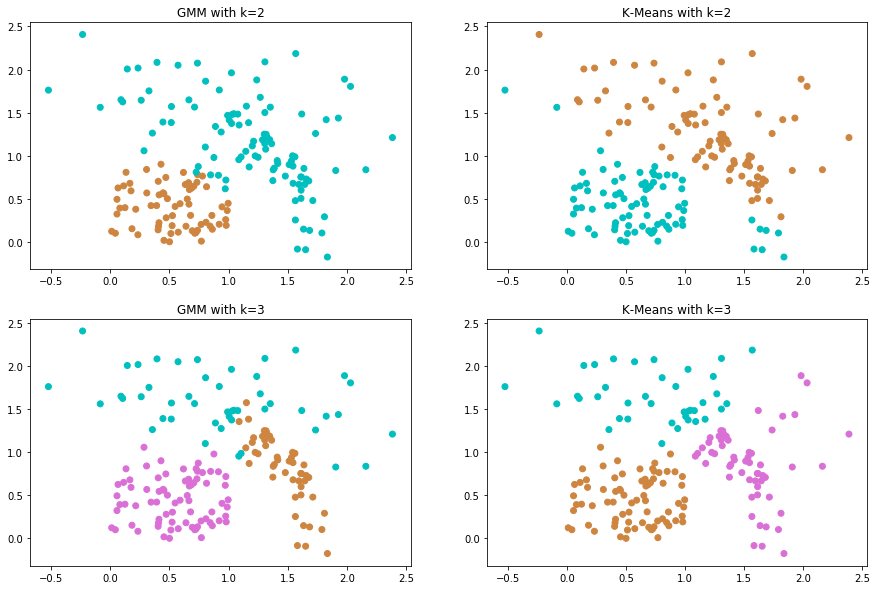

In [237]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plots for GMM k=2
gmmk2_colors = np.array(["c" if ii else "peru" for ii in dfFinal.iloc[0]])
ax[0, 0].scatter(x=df["x"], y=df["y"], c=gmmk2_colors)
ax[0, 0].set_title("GMM with k=2")

kmeansk2_colors = np.array(["c" if ii else "peru" for ii in dfFinal.iloc[2]])
ax[0, 1].scatter(x=df["x"], y=df["y"], c=kmeansk2_colors)
ax[0, 1].set_title("K-Means with k=2")

gmmk3_colors = dfFinal.iloc[1].map({0:"c", 1:"peru", 2:"orchid"})
ax[1, 0].scatter(x=df["x"], y=df["y"], c=gmmk3_colors)
ax[1, 0].set_title("GMM with k=3")

kmeansk3_colors = dfFinal.iloc[3].map({0:"c", 1:"peru", 2:"orchid"})
ax[1, 1].scatter(x=df["x"], y=df["y"], c=kmeansk3_colors)
ax[1, 1].set_title("K-Means with k=3");

**Part A**: According to the Rand Statistic, the best performing model was the GMM with $k=3$. From the graphs above, we can see why it had the best outcome. This GMM was the only model that was able to capture a large amount of the "polar" cluster without combining it with another cluster, due to it being able to weight the different components. It also able to capture the shape of the "uniform" cluster, even though that was more common with the other models. In general, a GMM should be able to detect differences in overlapping clusters better than K-Means because of the weights on each component, which was demonstrated in the problem.

**Part B**: Both the k=2 models had the worst Rand Scores, with the K-Means model having 0.4950 and the GMM having 0.4708. As we can see in the graph, both those models combined most of the "polar" and "normal" clusters together into a single cluster, which greatly reduced their similarity scores. We can also see that the K-Means model was better at seperating the "uniform" data from the other clusters. It makes sense that the GMM performed the worst because, not only was it using the wrong number of components, but 2 of the three categories did not follow gaussian distributions. Because of this, it was worse at fitting those points than the K-Means, which only matches on distance and doesn't try to estimate the underlying parameters of the model.